In [5]:
import os
root_dir = os.getcwd().replace('/Notebooks','')
root_dir

'/home/yakub/Documents/Python/Zipline'

In [10]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [9]:
import pandas as pd
from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

long_mavg_days = 40
short_mavg_days = 10

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first long_mavg days to get full windows
    context.i += 1
    if context.i < long_mavg_days:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', 
                                bar_count=short_mavg_days, 
                                frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', 
                             bar_count=long_mavg_days, 
                             frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

In [10]:
from zipline import run_algorithm
# import warnings
# warnings.filterwarnings('ignore')

start = pd.Timestamp('2014')
end = pd.Timestamp('2018')

perf = run_algorithm(start=start,
                       end=end,
                       initialize=initialize,
                       handle_data=handle_data,
                       capital_base=100_000,
                       bundle='quandl',
                       data_frequency='daily'
                    )

/home/yakub/anaconda3/lib/python3.9/site-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
/home/yakub/anaconda3/lib/python3.9/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/home/yakub/anaconda3/lib/python3.9/site-packages/empyrical/stats.py:706: RuntimeWarning: invalid value encountered in divide
  np.divide(
/home/yakub/anaconda3/lib/python3.9/site-packages/zipline/data/data_portal.py:951: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
/home/yakub/anaconda3/li

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

perf.columns

Index(['period_open', 'period_close', 'orders', 'pnl', 'capital_used',
       'longs_count', 'starting_exposure', 'portfolio_value', 'ending_cash',
       'long_exposure', 'short_value', 'ending_value', 'long_value',
       'starting_cash', 'shorts_count', 'starting_value', 'positions',
       'ending_exposure', 'transactions', 'returns', 'gross_leverage',
       'short_exposure', 'net_leverage', 'algo_volatility',
       'benchmark_period_return', 'benchmark_volatility', 'trading_days',
       'period_label', 'max_leverage', 'max_drawdown', 'excess_return',
       'treasury_period_return', 'algorithm_period_return', 'sortino', 'alpha',
       'beta', 'sharpe', 'AAPL', 'short_mavg', 'long_mavg'],
      dtype='object')

In [12]:
perf.tail()

,period_open,period_close,orders,pnl,capital_used,longs_count,starting_exposure,portfolio_value,ending_cash,long_exposure,...,excess_return,treasury_period_return,algorithm_period_return,sortino,alpha,beta,sharpe,AAPL,short_mavg,long_mavg
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,[],0.0,0.0,1,17501.0,110771.9305,93270.9305,17501.0,...,0.0,0.0,0.107719,1.668835,None,None,1.005764,175.01,173.806,171.8573
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,[],-444.0,0.0,1,17501.0,110327.9305,93270.9305,17057.0,...,0.0,0.0,0.103279,1.590363,None,None,0.963338,170.57,173.596,172.0453
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,[],3.0,0.0,1,17057.0,110330.9305,93270.9305,17060.0,...,0.0,0.0,0.103309,1.590006,None,None,0.963120,170.60,173.486,172.1423
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,[],48.0,0.0,1,17060.0,110378.9305,93270.9305,17108.0,...,0.0,0.0,0.103789,1.596153,None,None,0.966824,171.08,173.367,172.1933
2017-12-29 21:00:00+00:00,2017-12-29 14:31:00+00:00,2017-12-29 21:00:00+00:00,[],-185.0,0.0,1,17108.0,110193.9305,93270.9305,16923.0,...,0.0,0.0,0.101939,1.566414,None,None,0.949606,169.23,173.068,172.2518


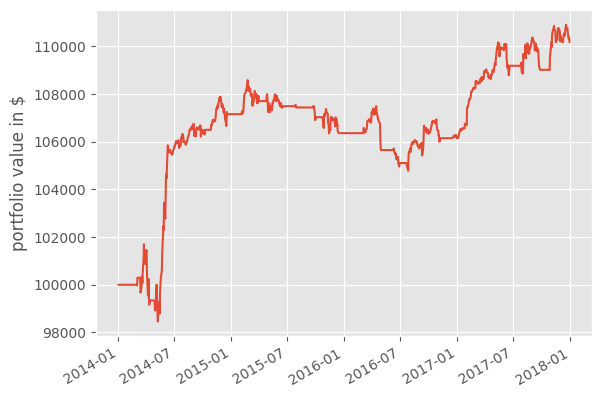

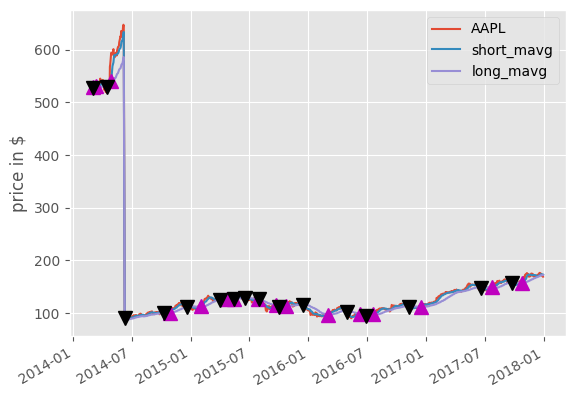

In [13]:
import matplotlib.pyplot as plt

# Figure 1
fig1, ax1 = plt.subplots()
perf.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('portfolio value in $')

plt.show()

# Figure 2
fig2, ax2 = plt.subplots()
perf['AAPL'].plot(ax=ax2)
perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

perf_trans = perf.loc[[t != [] for t in perf.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax2.plot(buys.index, perf.short_mavg.loc[buys.index], '^', markersize=10, color='m')
ax2.plot(sells.index, perf.short_mavg.loc[sells.index], 'v', markersize=10, color='k')
ax2.set_ylabel('price in $')
plt.legend(loc=0)

plt.show()
